In [1]:
# Importing all the necessary librarires 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder


In [32]:
df = pd.read_csv("C:\\Users\\satap\\OneDrive\\Desktop\\archive (2)\\train.csv")
df.head()

C:\Users\satap\AppData\Local\Temp\ipykernel_3004\3013223818.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\satap\\OneDrive\\Desktop\\archive (2)\\train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [33]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


* Here only the numerical columns are being displayed, even though there are numeric entries in the form of string in many other columns

In [34]:
# Let's find the null values in the dataset
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [35]:
df.shape

(100000, 28)

In [36]:
df["Customer_ID"].nunique()

12500

c:\Users\satap\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


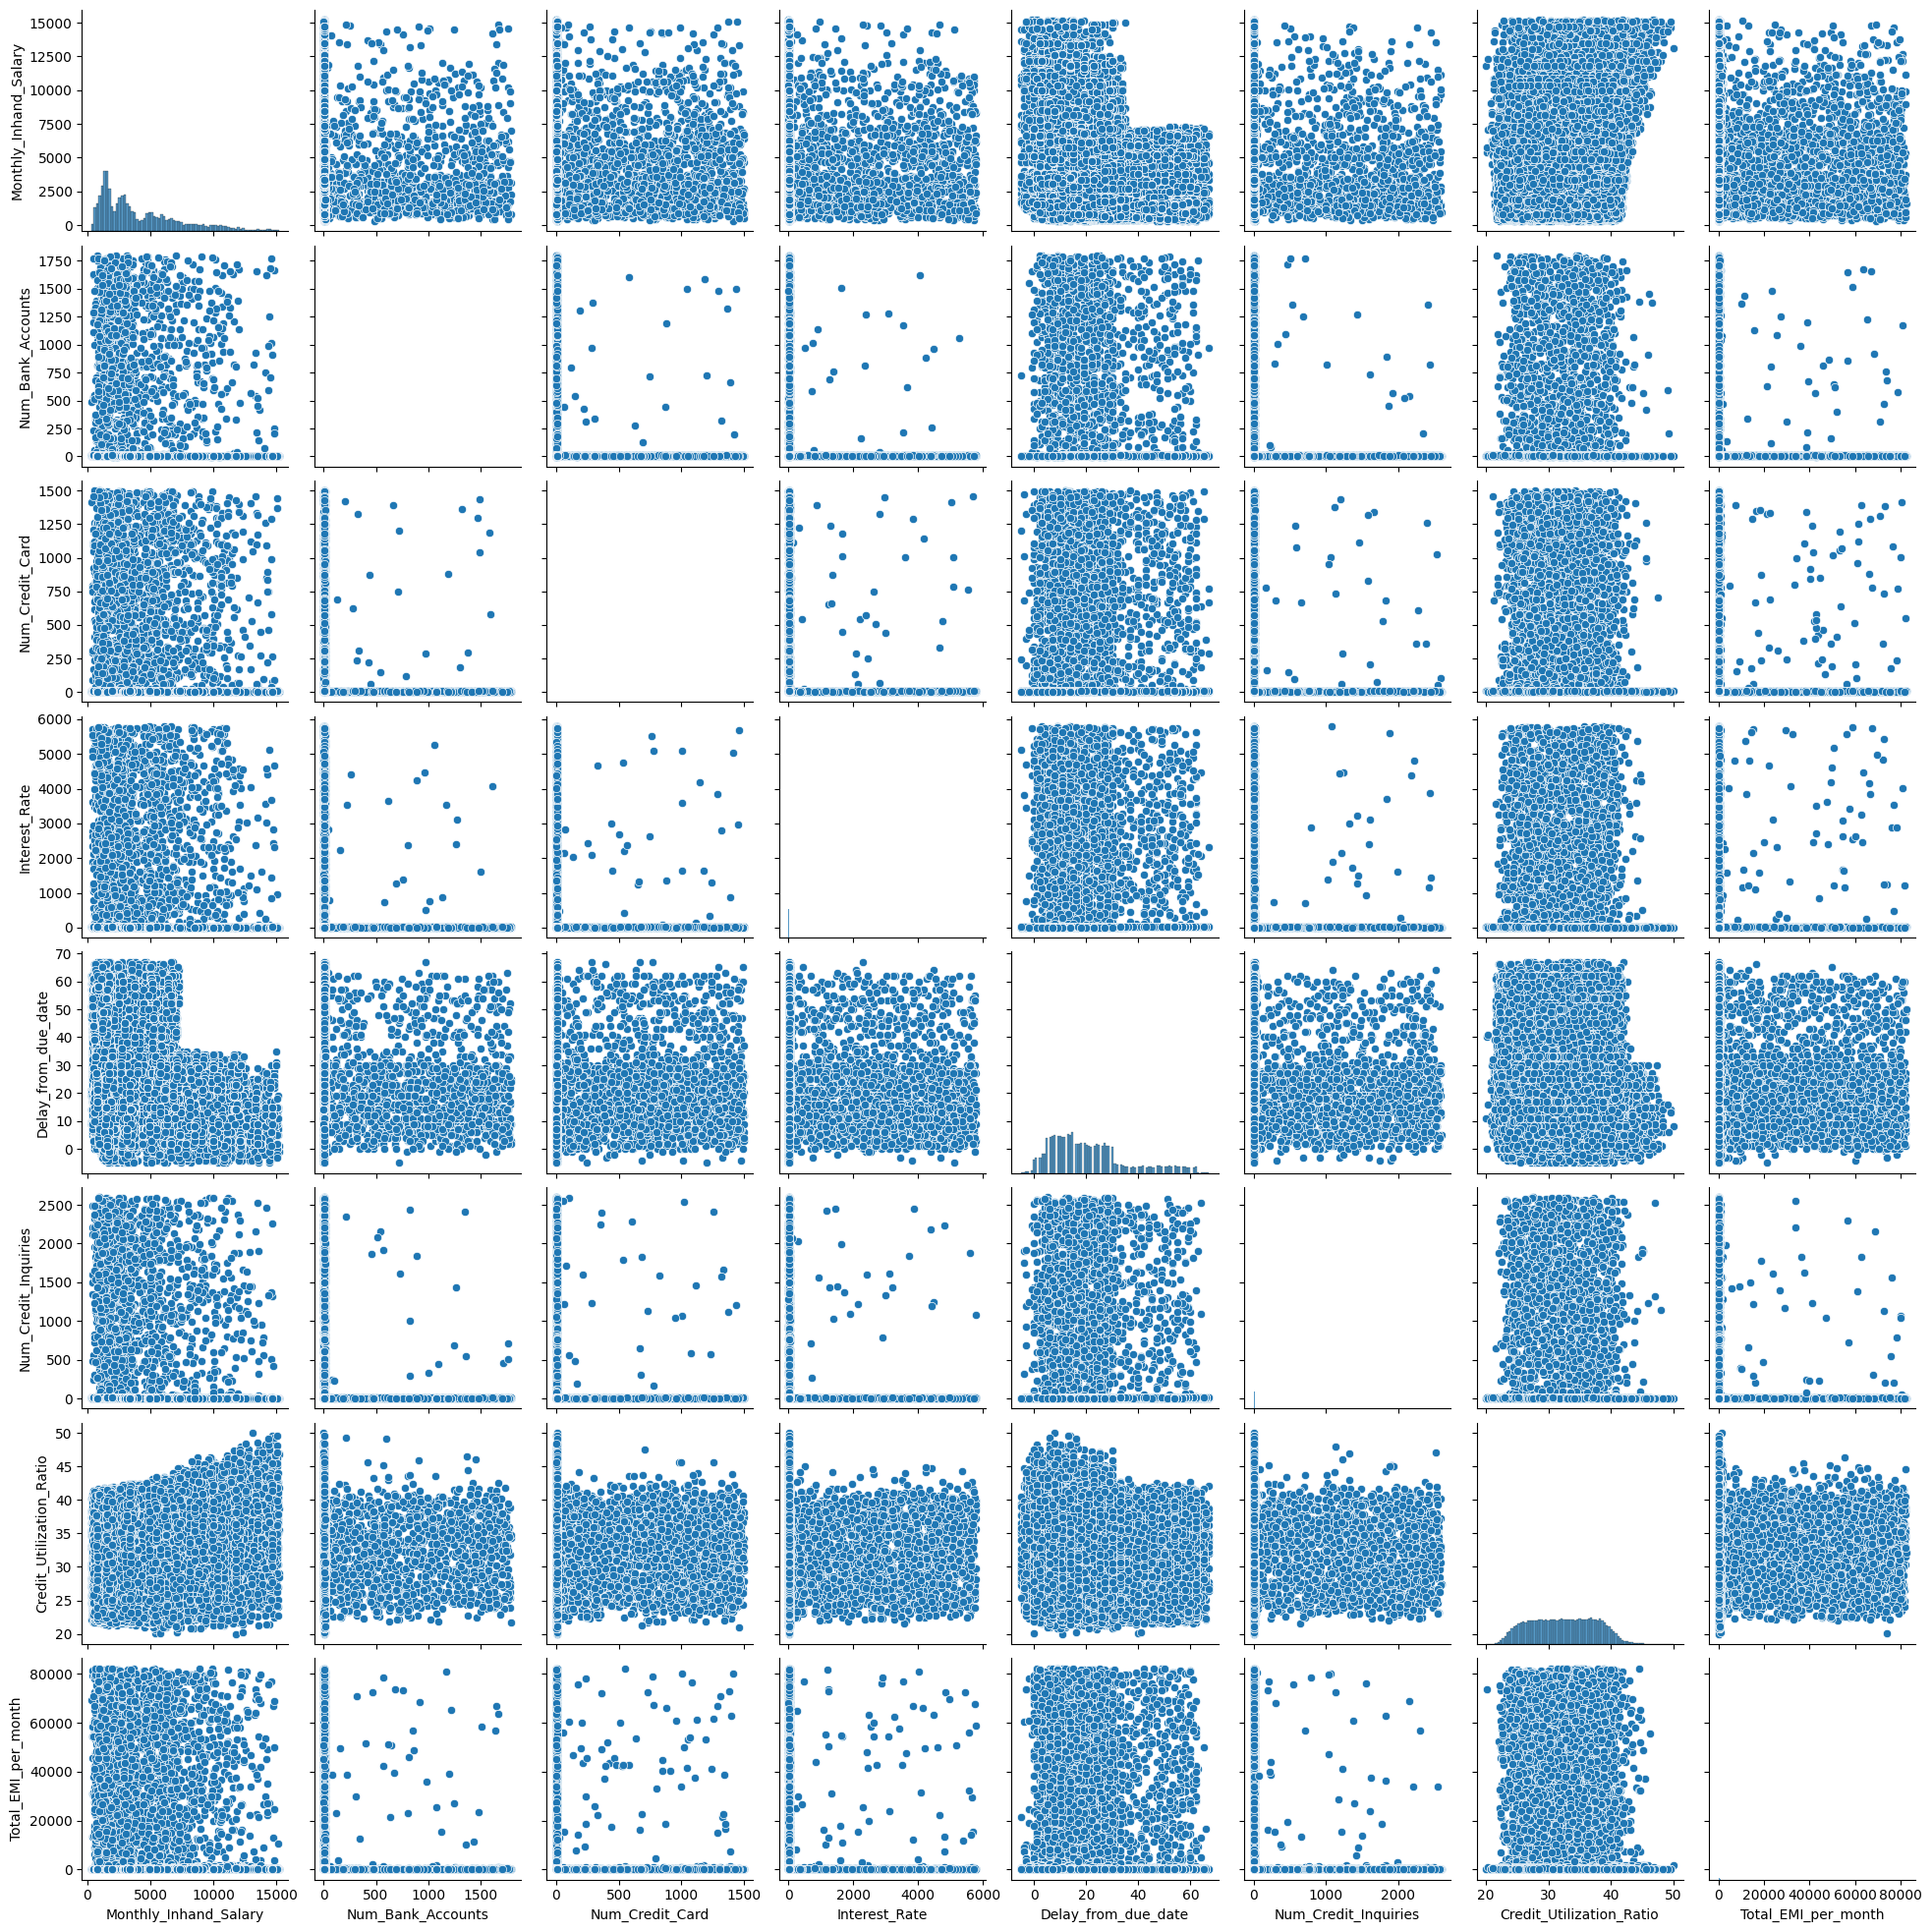

In [37]:
sns.pairplot(df)

* As we can see there are 1 Lakhs rows and 28 columns in our dataset
* We need to do data cleaning and remove/replace the null values, outlier values and negative values from the dataset, before creating any machine learning model
* Our dataset might also contains noisy dataset like, blank or cryptice hash values, we also need to check and replace those values 

* On examining the dataset we can see that, it contains data of customer for the months of January to August
* Each customer is represented using unique customer_ID
* We can use that customer_ID during data cleaning to find some insights and also deal with the negative, outlier or null values

* We are going to incorporate mainly 2 methods or functions namely, Mode_method and outlier_removal

* Mode_method will group the data, according to the customer_id and see for the missing values
* The features like age,ssn,occupation,annual_incom,etc. will remain same and constant for a particular person
* Hence we can use the same value for all the rows of a particular customer
* We will identify and distinguish the customers using customer_id 
* For example customer having customer_id 5, enters his age as 34,34,34,3,34,nan,-4,34 respectively in the 8 rows assigneed per customer
* So here we will take the mode of the age column for that particular customer and replace all the values with mode of that customer's age
* By doing so, the values like 3,-4 and nan will be removed and imputed with the original and correct values, which is 34 in this case

* Thus, for other columns too, we are incorporating mode_method and imputing the datast with the most frequent value entered by the customer
* As a human might have entered incorrect value in one of the 8 rows 

In [9]:
df_no_null = df.dropna()
df_no_null.shape

(53049, 28)

* As we can see, if we remove all the rows having null values, our dataset will be reduced to around 50%, which is considered to be a significant loss, hence, we have saved huge amount of data by incorporating this custom function mode_method

* Secondly we are going to remove the outliers from the dataset by using outliers_removal function 
* As seen in the df.describe(), the maximum values found in the columns like "Num_Credit_Card" is 1499, then in column "Num_Bank_Accounts", the max value is 1798
* This high value seems false and outlier
* So we will use inter-quartile range and whisker range to find and detect the outliers in the columns
* Thus, by removing those values we will get rid of the outliers

# Data Cleaning

* Individual column wise data cleaning and removal is to be undertaken

In [10]:
columns_ = ['Monthly_Balance','Payment_of_Min_Amount','Payment_Behaviour','Credit_History_Age',
            'Amount_invested_monthly','Credit_Utilization_Ratio','Changed_Credit_Limit','Type_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment']
df1 = df.drop(columns=columns_)
columns_1 = ['ID','Customer_ID','Month']
df2 = df1.drop(columns=columns_1)
remaining_columns = df2.columns
for cuid in df1['Customer_ID'].unique():
    cuid_rows = df1[df1['Customer_ID'] == cuid]
    for i in remaining_columns:
        mode_a = cuid_rows[i].mode()
        if(df1.loc[df1['Customer_ID'] == cuid, i] != mode_a.iloc[0]).any().item():
            df1.loc[df1['Customer_ID'] == cuid, i] = mode_a.iloc[0]
df1

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Total_EMI_per_month,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,4.0,Good,809.98,49.574949,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,4.0,Good,809.98,49.574949,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,4.0,Good,809.98,49.574949,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,4.0,Good,809.98,49.574949,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,4.0,Good,809.98,49.574949,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,3.0,Good,502.38,35.104023,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,3.0,Good,502.38,35.104023,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,3.0,Good,502.38,35.104023,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,3.0,Good,502.38,35.104023,Poor


In [11]:
df.update(df1)

In [12]:
df.to_csv("C:\\Users\\satap\\OneDrive\\Desktop\\mode_df.csv",index=False)

## Num_of_Delayed_Payment

In [13]:
column_to_process = 'Num_of_Delayed_Payment'
df[column_to_process] = df[column_to_process].str.rstrip('_')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
Q1 = df['Num_of_Delayed_Payment'].quantile(0.25)
Q3 = df['Num_of_Delayed_Payment'].quantile(0.75)
IQR = Q3 - Q1
whishker_max = Q3 + 1.5*IQR
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: 'Krutin' if pd.notna(x) and (x < 0 or x > whishker_max) else x)
df = df[df['Num_of_Delayed_Payment'] != 'Krutin']
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [14]:
mean_Num_of_Delayed_Payment = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].mean()

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Customer_ID'].map(mean_Num_of_Delayed_Payment))
df['Num_of_Delayed_Payment']

0        7.0
1        6.0
2        7.0
3        4.0
4        6.0
        ... 
99995    7.0
99996    7.0
99997    6.0
99998    6.4
99999    6.0
Name: Num_of_Delayed_Payment, Length: 98620, dtype: float64

## Changed_Credit_Limit

In [15]:
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

mean_Changed_Credit_Limit = df.groupby('Customer_ID')['Changed_Credit_Limit'].mean()

df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Customer_ID'].map(mean_Changed_Credit_Limit))
df['Changed_Credit_Limit']

0        11.27
1        11.27
2        10.27
3         6.27
4        11.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 98620, dtype: float64

## Monthly_Balance

In [16]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

mean_monthly_balance = df.groupby('Customer_ID')['Monthly_Balance'].mean()

for cuid in df['Customer_ID'].unique():
    ind = (df['Customer_ID'] == cuid) & df['Monthly_Balance'].isnull()
    df.loc[ind, 'Monthly_Balance'] = mean_monthly_balance[cuid]

## Amount_invested_monthly

In [17]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

mean_amount_invested = df.groupby('Customer_ID')['Amount_invested_monthly'].mean()

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('_10000_', 'NaN')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Customer_ID'].map(mean_amount_invested))


## Credit_History_Age

In [18]:
df['Credit_History_Age'] = df['Credit_History_Age'].astype(str)

for cuid in df['Customer_ID'].unique():
    subset = df[df['Customer_ID'] == cuid]
    # print(subset)
    for i in range(1, len(subset)):
      array1=[]
      current_value = subset.iloc[i]['Credit_History_Age']
      if current_value.lower() == 'nan':
        previous_value = subset.iloc[i - 1]['Credit_History_Age']
        # print(i,previous_value)
        array1 = (previous_value.split())
        # print(int(array1[3])+1)
        if array1[0].isdigit() and array1[3].isdigit():
              incremented_age = f"{int(array1[0])} Years and {int(array1[3]) + 1} Months"
              df.at[subset.index[i], 'Credit_History_Age'] = incremented_age


In [19]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce', downcast='integer')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce', downcast='integer')
# df['SSN'] = pd.to_numeric(df['SSN'], errors='coerce', downcast='integer')

In [20]:
numeric_data = df.select_dtypes(include =['float','int'],exclude=['object'])
numeric_data

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089
1,1824.843333,3,4,3,4.0,-1,6.0,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629163
2,1824.843333,3,4,3,4.0,3,7.0,10.27,4.0,809.98,28.609352,49.574949,81.699521,331.209863
3,1824.843333,3,4,3,4.0,5,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310
4,1824.843333,3,4,3,4.0,6,6.0,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3359.415833,4,6,7,2.0,23,7.0,11.50,3.0,502.38,34.663572,35.104023,60.971333,479.866228
99996,3359.415833,4,6,7,2.0,18,7.0,11.50,3.0,502.38,40.565631,35.104023,54.185950,496.651610
99997,3359.415833,4,6,7,2.0,27,6.0,11.50,3.0,502.38,41.255522,35.104023,24.028477,516.809083
99998,3359.415833,4,6,7,2.0,20,6.4,11.50,3.0,502.38,33.638208,35.104023,251.672582,319.164979


## Payment_of_Min_Amount

In [21]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [22]:
df['Payment_of_Min_Amount'].value_counts()


Payment_of_Min_Amount
Yes    51945
No     46675
Name: count, dtype: int64

## Payment_Behaviour

In [23]:
df.shape

(98620, 28)

In [24]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)
df.dropna(subset=['Payment_Behaviour'], inplace=True)
df.shape
# 6715 rows removed

(91116, 28)

In [25]:
df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25201
High_spent_Medium_value_payments    17284
Low_spent_Medium_value_payments     13681
High_spent_Large_value_payments     13484
High_spent_Small_value_payments     11197
Low_spent_Large_value_payments      10269
Name: count, dtype: int64

* Later we will convert categorical feature into integer values

# Transforming into Categorical Features

In [26]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Payment_Behaviour', 'Occupation', 'Month','Payment_of_Min_Amount', 'Credit_Mix'])
df = df_encoded

In [ ]:
df.shape

(91116, 59)

In [ ]:
df.dtypes

ID                                                     object
Customer_ID                                            object
Name                                                   object
Age                                                    object
SSN                                                    object
Annual_Income                                          object
Monthly_Inhand_Salary                                 float64
Num_Bank_Accounts                                       int64
Num_Credit_Card                                         int64
Interest_Rate                                           int64
Num_of_Loan                                           float64
Type_of_Loan                                           object
Delay_from_due_date                                     int64
Num_of_Delayed_Payment                                float64
Changed_Credit_Limit                                  float64
Num_Credit_Inquiries                                  float64
Outstand

In [27]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,22 Years and 2 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [28]:
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce', downcast='integer')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce', downcast='integer')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce', downcast='integer')

# Outliers Removal

In [29]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce', downcast='integer')

In [30]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [31]:
columns_to_remove_outliers = df.select_dtypes(include =['float','int'],exclude=['object'])
columns_to_remove_outliers.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089
1,23.0,19114.12,1824.843333,3,4,3,4.0,-1,6.0,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629163
2,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,10.27,4.0,809.98,28.609352,49.574949,81.699521,331.209863
3,23.0,19114.12,1824.843333,3,4,3,4.0,5,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,6.0,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231


In [32]:
import pandas as pd

def remove_outliers(df, column_name, threshold=1.5, replacement_value=-9999):
    # Convert to numeric, handle errors
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    # Calculate quartiles and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define whisker limits
    whisker_max = Q3 + threshold * IQR

    # Create a boolean mask for outliers
    outliers_mask = (df[column_name].apply(lambda x: pd.notna(x) and (x < Q1 - threshold * IQR or x > whisker_max)))

    # Replace values outside whiskers with a numerical replacement value using .loc on a copy
    df_copy = df.copy()
    df_copy.loc[outliers_mask, column_name] = replacement_value

    # Filter rows not equal to the replacement value in the copy
    df_copy = df_copy[df_copy[column_name] != replacement_value]

    return df_copy

for column in columns_to_remove_outliers:
    df = remove_outliers(df, column)


In [37]:
df.to_csv('C:\\Users\\satap\\OneDrive\\Desktop\\modified_data.csv',index = False)

In [33]:
df.shape

(63817, 28)

In [34]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,63802.000000,63796.000000,63817.000000,63817.000000,63817.000000,63817.000000,63810.000000,63817.000000,63817.000000,63817.000000,63817.000000,63817.000000,63817.000000,63817.000000,63817.000000,63817.000000
mean,33.400928,37408.240971,3113.329829,5.266058,5.406694,14.045724,3.311581,19.160772,13.145044,9.888173,5.442202,1213.853404,32.037895,73.172090,140.927282,366.578574
std,10.826551,24380.213708,2034.395461,2.492592,1.983923,8.397458,2.220942,12.435486,5.911431,6.012258,3.634349,843.224808,4.992754,66.783136,97.708490,132.398024
min,14.000000,7005.930000,332.128333,0.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,21.264254,0.000000,0.000000,0.088628
25%,25.000000,18063.710000,1517.371667,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.400000,3.000000,543.370000,27.847450,24.408619,67.682073,276.025035
50%,33.000000,31633.940000,2626.573333,5.000000,5.000000,12.000000,3.000000,17.000000,13.000000,9.310000,5.000000,1104.600000,32.041501,52.839134,114.235758,333.639500
75%,42.000000,50733.180000,4238.663333,7.000000,7.000000,19.000000,5.000000,26.000000,18.000000,13.880000,8.000000,1657.790000,36.259044,102.577804,187.773399,432.124692
max,56.000000,145175.400000,12016.950000,10.000000,11.000000,34.000000,9.000000,55.000000,28.000000,28.930000,15.000000,3650.330000,43.947467,293.318317,455.773475,758.717958


In [35]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [36]:
df.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                           0
Age                           15
SSN                            0
Occupation                     0
Annual_Income                 21
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    7
Type_of_Loan                6909
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

# Columns to Drop

* ID, Customer_ID , Name,SSN,Type_of_Loan only

* For Credit_History_Age we imputed the missing values of sequence like 2 years and 4 months. But it's in the string format and not usable so we can again convert it into years and thus in float format, in order to use that 

* Then Credit_Score is the target variable


In [38]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,22 Years and 2 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


<Axes: >

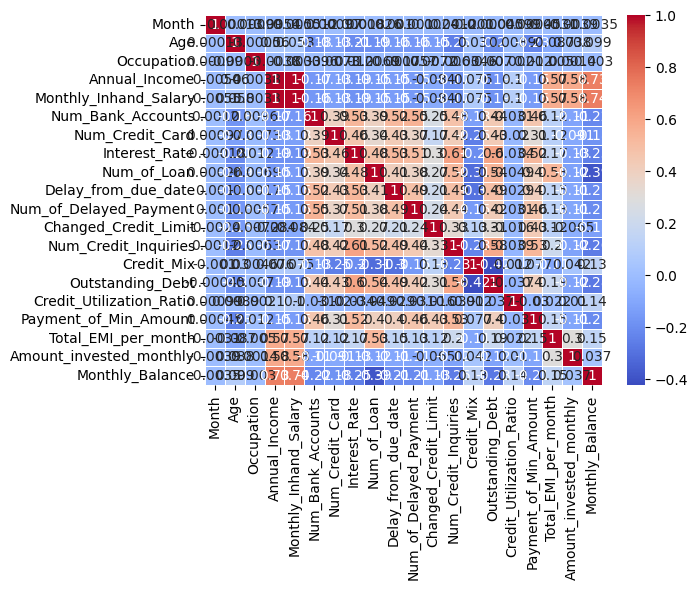

In [20]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
modi_df = pd.read_csv('C:\\Users\\satap\\OneDrive\\Desktop\\modified_data.csv')
modi_df = modi_df[modi_df['Occupation'] != '_______']
modi_df['Occupation'].unique()
occupation_mapping = {
    'Scientist': 1,
    'Teacher': 2,
    'Entrepreneur': 3,
    'Developer': 4,
    'Lawyer': 5,
    'Media_Manager': 6,
    'Doctor': 7,
    'Journalist': 8,
    'Engineer': 9,
    'Manager': 10,
    'Musician': 11,
    'Writer': 12,
    'Accountant': 13,
    'Architect': 14,
    'Mechanic': 15,
}
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
Payment_of_Min_Amount_mapping = {
    'Yes' : 1,
    'No' : 0
}
Credit_Mix_mapping = {
    'Standard' : 2,
    'Good' : 1,
    'Bad' : 0,
}

modi_df['Credit_Mix'] = modi_df['Credit_Mix'].map(Credit_Mix_mapping)
modi_df['Payment_of_Min_Amount'] = modi_df['Payment_of_Min_Amount'].map(Payment_of_Min_Amount_mapping)
# Apply the mapping to the 'Month' column
modi_df['Month'] = modi_df['Month'].map(month_mapping)
modi_df['Occupation'] = modi_df['Occupation'].map(occupation_mapping)
modi_df.to_csv('C:\\Users\\satap\\OneDrive\\Desktop\\Final_data.csv',index=False)

col_d = ['ID','Customer_ID','Name','Credit_History_Age','Payment_Behaviour','SSN','Type_of_Loan','Credit_Score']
corr_df = modi_df.drop(columns=col_d)
correlation_matrix = corr_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

In [2]:
fd = pd.read_csv('C:\\Users\\satap\\OneDrive\\Desktop\\KDDM Project\\Group-4_Final_Project_Credit_Score_Classification\\Final_data.csv')
fd

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23.0,821-00-0265,1,19114.12,1824.843333,3,...,1.0,809.98,26.822620,22.083333,0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23.0,821-00-0265,1,19114.12,1824.843333,3,...,1.0,809.98,31.944960,22.166667,0,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,23.0,821-00-0265,1,19114.12,1824.843333,3,...,1.0,809.98,28.609352,22.250000,0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23.0,821-00-0265,1,19114.12,1824.843333,3,...,1.0,809.98,31.377862,22.333333,0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23.0,821-00-0265,1,19114.12,1824.843333,3,...,1.0,809.98,24.797347,22.416667,0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63804,0x25fe8,CUS_0x942c,3,Nicks,25.0,078-73-5990,15,39628.99,3359.415833,4,...,1.0,502.38,39.323569,31.416667,0,35.104023,140.581403,High_spent_Medium_value_payments,410.256158,Poor
63805,0x25fe9,CUS_0x942c,4,Nicks,25.0,078-73-5990,15,39628.99,3359.415833,4,...,1.0,502.38,34.663572,31.500000,0,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
63806,0x25fea,CUS_0x942c,5,Nicks,25.0,078-73-5990,15,39628.99,3359.415833,4,...,1.0,502.38,40.565631,31.583333,0,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
63807,0x25feb,CUS_0x942c,6,Nicks,25.0,078-73-5990,15,39628.99,3359.415833,4,...,1.0,502.38,41.255522,31.666667,0,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor


In [3]:
fd['Annual_Income'].dropna()

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
63804    39628.99
63805    39628.99
63806    39628.99
63807    39628.99
63808    39628.99
Name: Annual_Income, Length: 63788, dtype: float64

In [4]:
fd['Credit_History_Age'] = fd['Credit_History_Age'].apply(
    lambda x: (float(x.split()[0]) + float(x.split()[3]) / 12) if isinstance(x, str) and 'Years' in x else (float(x) / 12) if isinstance(x, (int, float)) else x)

In [6]:
fd.to_csv('C:\\Users\\satap\\OneDrive\\Desktop\\Final_data.csv')

In [5]:
final = pd.read_csv('./Final_data.csv') # The final_data.csv contains data after cleaning having no null values and imputed values
final.shape

(63809, 28)

In [8]:
sns.pairplot(final)

KeyboardInterrupt: 

In [6]:
final.drop(columns=['Type_of_Loan'],axis=1,inplace=True)

In [7]:
final.dropna(inplace=True)
final.isna().sum()
final.shape

(61934, 27)

Model Prediction

In [8]:
X = final.drop(columns=["ID","Customer_ID","Name","SSN","Monthly_Inhand_Salary","Monthly_Balance","Payment_Behaviour","Credit_Score"],axis=1)
Y = final["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [7]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = classification_report(y_test, y_pred)
print(f"Accuracy for Support Vector Machine Classifier is {accuracy:.3f}")

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [18]:
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred_3 = knn_3.predict(X_test)
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

        Good       0.83      0.85      0.84      3663
        Poor       0.94      0.93      0.93      5965
    Standard       0.92      0.92      0.92      8953

    accuracy                           0.91     18581
   macro avg       0.90      0.90      0.90     18581
weighted avg       0.91      0.91      0.91     18581



In [20]:
from sklearn.linear_model import LogisticRegression

In [22]:
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train,y_train)
logit_pred=logit.predict(X_test)

print(classification_report(y_test,logit_pred))

c:\Users\satap\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

        Good       0.59      0.48      0.53      3663
        Poor       0.77      0.65      0.71      5965
    Standard       0.67      0.79      0.72      8953

    accuracy                           0.68     18581
   macro avg       0.68      0.64      0.65     18581
weighted avg       0.69      0.68      0.68     18581



In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets

# Assuming you have your data in the 'X' variable

# Calculate inertia for different values of K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=12)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

NameError: name 'X' is not defined

In [1]:
from sklearn.cluster import KMeans

num_clusters = 5  # Data set has 3 type of credit score
kmeans = KMeans(n_clusters=num_clusters, random_state=12)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
df_cluster=pd.DataFrame({'Actual':Y,'Cluster':labels})
# Create a cross-tabulation
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])

print(cross_tab)

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

NameError: name 'X' is not defined

In [24]:
from sklearn.naive_bayes import GaussianNB

model_naive = GaussianNB()
model_naive.fit(X_train, y_train)
y_pred = model_naive.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.51      0.83      0.63      3663
        Poor       0.79      0.70      0.74      5965
    Standard       0.81      0.67      0.73      8953

    accuracy                           0.71     18581
   macro avg       0.70      0.73      0.70     18581
weighted avg       0.75      0.71      0.72     18581



In [27]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n",class_report)

Classification Report:
               precision    recall  f1-score   support

        Good       0.98      0.97      0.98      3663
        Poor       0.99      0.98      0.99      5965
    Standard       0.98      0.99      0.99      8953

    accuracy                           0.99     18581
   macro avg       0.99      0.98      0.98     18581
weighted avg       0.99      0.99      0.99     18581



In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n",class_report)

Classification Report:
               precision    recall  f1-score   support

        Good       0.95      0.95      0.95      3663
        Poor       0.97      0.97      0.97      5965
    Standard       0.97      0.97      0.97      8953

    accuracy                           0.96     18581
   macro avg       0.96      0.96      0.96     18581
weighted avg       0.96      0.96      0.96     18581

